In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import csv


# Data Reading

In [12]:
col = []
for i in range(1,24):
    col.append(i)
mushroom_df = pd.read_csv("/home/pratik/Downloads/Assignment1 Dataset/Datasets/q2/train.csv",header = None)
mushroom_df.columns = col

# Data Cleaning

In [13]:
mushroom_df.iloc[:,11].unique()

array(['?', 'e', 'b', 'r', 'c'], dtype=object)

# Spliting Data -> Training(80%) and Validation(20%)

In [14]:
msk = np.random.rand(len(mushroom_df)) < 0.2

In [15]:
training_df = mushroom_df[~msk].copy()
validation_df = mushroom_df[msk].copy()
print(training_df.shape)
print(validation_df.shape)

(3590, 23)
(906, 23)


# Validation Data Check (KNN)

In [7]:
# Main Function


In [16]:
result=[]
validationresult1=[]
validationresult2=[]
validationresult3=[]
validationresult4=[]
validationresult5=[]
validationresult6=[]
for j in range(0,len(validation_df)): ## takes entry from test data
    result=[]
    print(j)
    for i in range(0,len(training_df)): ## takes each tuple of training data
        x = compare(list(training_df.iloc[i]),list(validation_df.iloc[j]))
        result.append([training_df.iloc[i,0],x])
    result.sort(key = sortbysecond)
    getcount(result,validationresult1,validationresult2,validationresult3,validationresult4,validationresult5,validationresult6)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [58]:
# Helper Functions

In [8]:
k1=5
k2=30
k3=50
k4=80
k5=90
k6=20

def compare(training_df,validation_df):
    countt=0
    for x in range(1,len(training_df)):
        if(training_df[x] != validation_df[x]):
            countt = countt + 1    
    return countt

def sortbysecond(val):
    return val[1]

def getcount(result,answer1,answer2,answer3,answer4,answer5,answer6):
    countte=0
    counttp=0
    ans=0
    for i in range(0,k5):
        if(result[i][0] == 'e'):
            countte = countte + 1
        else:
            counttp = counttp+1
        if(i==k1-1):
            if(counttp > countte):
                ans = 'p'
            else:
                ans = 'e'
            answer1.append(ans)
        elif(i==k2-1):
            if(counttp > countte):
                ans = 'p'
            else:
                ans = 'e'
            answer2.append(ans)
        elif(i==k3-1):
            if(counttp > countte):
                ans = 'p'
            else:
                ans = 'e'
            answer3.append(ans)
        elif(i==k4-1):
            if(counttp > countte):
                ans = 'p'
            else:
                ans = 'e'
            answer4.append(ans)
        elif(i==k5-1):
            if(counttp > countte):
                ans = 'p'
            else:
                ans = 'e'
            answer5.append(ans)
        elif(i==k6-1):
            if(counttp > countte):
                ans = 'p'
            else:
                ans = 'e'
            answer6.append(ans)

# Validation Report

In [17]:
k_axis=[]
accuracy_axis=[]
precision_axis=[]
recall_axis=[]
f1_score_axis=[]
kk=[5,30,50,80,90]

In [18]:
def checkresult(testresult):
    result = confusion_matrix(validation_df.iloc[:,0],testresult)
    print(result)
    print("Accuracy Score: ", accuracy_score(validation_df.iloc[:,0],testresult))
    print("Precision Score: ", precision_score(validation_df.iloc[:,0],testresult,average="macro",pos_label=1))
    print("Recall Score: ", recall_score(validation_df.iloc[:,0],testresult,average="macro",pos_label=1))
    print("F1 Score: " ,f1_score(validation_df.iloc[:,0],testresult,average="macro",pos_label=1))
    print("-------------------------------")
checkresult(validationresult1)
checkresult(validationresult2)
checkresult(validationresult3)
checkresult(validationresult4)
checkresult(validationresult5)

def storeresult(testresult):
    accuracy_axis.append(accuracy_score(validation_df.iloc[:,0],testresult))
    precision_axis.append(precision_score(validation_df.iloc[:,0],testresult,average="macro",pos_label=1))
    recall_axis.append(recall_score(validation_df.iloc[:,0],testresult,average="macro",pos_label=1))
    f1_score_axis.append(f1_score(validation_df.iloc[:,0],testresult,average="macro",pos_label=1))

storeresult(validationresult1)
storeresult(validationresult2)
storeresult(validationresult3)
storeresult(validationresult4)
storeresult(validationresult5)


[[313   0]
 [  0 594]]
Accuracy Score:  1.0
Precision Score:  1.0
Recall Score:  1.0
F1 Score:  1.0
-------------------------------
[[312   1]
 [  2 592]]
Accuracy Score:  0.9966923925027563
Precision Score:  0.9959721163037991
Recall Score:  0.9967190542270414
F1 Score:  0.996343965527666
-------------------------------
[[309   4]
 [  2 592]]
Accuracy Score:  0.9933847850055126
Precision Score:  0.9934288612184121
Recall Score:  0.9919267219586708
F1 Score:  0.9926712992889464
-------------------------------
[[301  12]
 [  2 592]]
Accuracy Score:  0.9845644983461963
Precision Score:  0.9867658951325596
Recall Score:  0.9791471692430158
F1 Score:  0.9827932918500532
-------------------------------
[[300  13]
 [  8 586]]
Accuracy Score:  0.9768467475192943
Precision Score:  0.9761615679812674
Recall Score:  0.972499220103054
F1 Score:  0.9742904462828658
-------------------------------


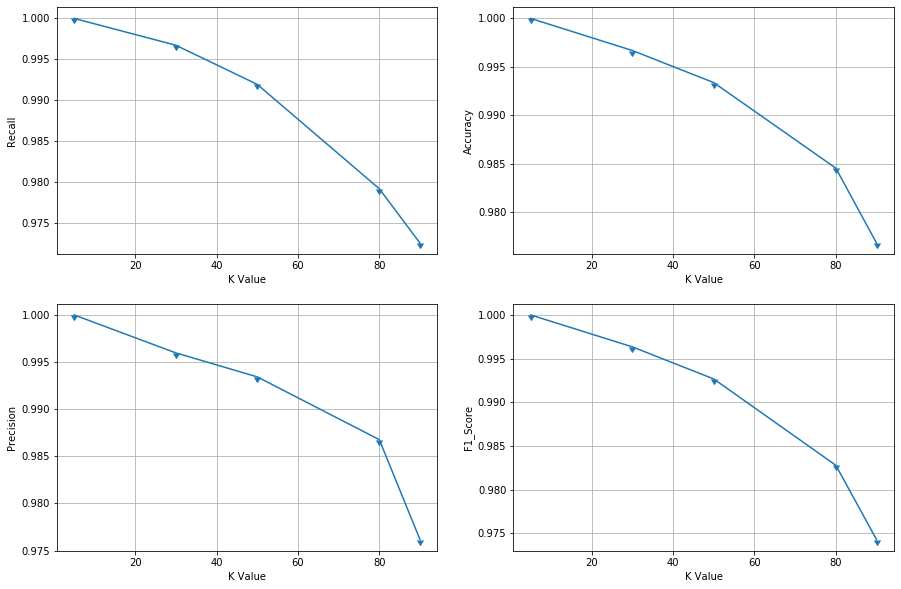

In [33]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(kk, recall_axis,marker=11,label="Recall")
plt.grid(True)
# plt.legend(loc="upper right")
plt.xlabel('K Value')
plt.ylabel('Recall')

plt.subplot(2,2,2)
# plt.figure(figsize=(8,5))
plt.plot(kk, accuracy_axis,marker=11)
plt.grid(True)
plt.xlabel('K Value')
plt.ylabel('Accuracy')
# plt.show()
plt.subplot(2,2,3)
# plt.figure(figsize=(8,5))
plt.plot(kk, precision_axis,marker=11)
plt.grid(True)
plt.xlabel('K Value')
plt.ylabel('Precision')
# plt.show()
plt.subplot(2,2,4)
# plt.figure(figsize=(5))
plt.plot(kk, f1_score_axis,marker=11)
plt.grid(True)
plt.xlabel('K Value')
plt.ylabel('F1_Score')
plt.show()
# recall_axis

# Comparision with Baseline

In [35]:
from random import choice
ll1=[]
ll2=[]
ll3=[]
ll4=[]
ll5=[]
for i in range(0,len(validation_df)):
    x=choice(['e','p'])
    ll1.append(x)
    
for i in range(0,len(validation_df)):
    x=choice(['e','p'])
    ll2.append(x)
    
for i in range(0,len(validation_df)):
    x=choice(['e','p'])
    ll3.append(x)
for i in range(0,len(validation_df)):
    x=choice(['e','p'])
    ll4.append(x)
for i in range(0,len(validation_df)):
    x=choice(['e','p'])
    ll5.append(x)
    
baselineresult_accuracy=[]
baselineresult_recall=[]
baselineresult_precision=[]
baselineresult_f1score=[]

def storeresult(testresult):
    baselineresult_accuracy.append(accuracy_score(validation_df.iloc[:,0],testresult))
    baselineresult_precision.append(precision_score(validation_df.iloc[:,0],testresult,average="macro",pos_label=1))
    baselineresult_recall.append(recall_score(validation_df.iloc[:,0],testresult,average="macro",pos_label=1))
    baselineresult_f1score.append(f1_score(validation_df.iloc[:,0],testresult,average="macro",pos_label=1))
storeresult(ll1)
storeresult(ll2)
storeresult(ll3)
storeresult(ll4)
storeresult(ll5)


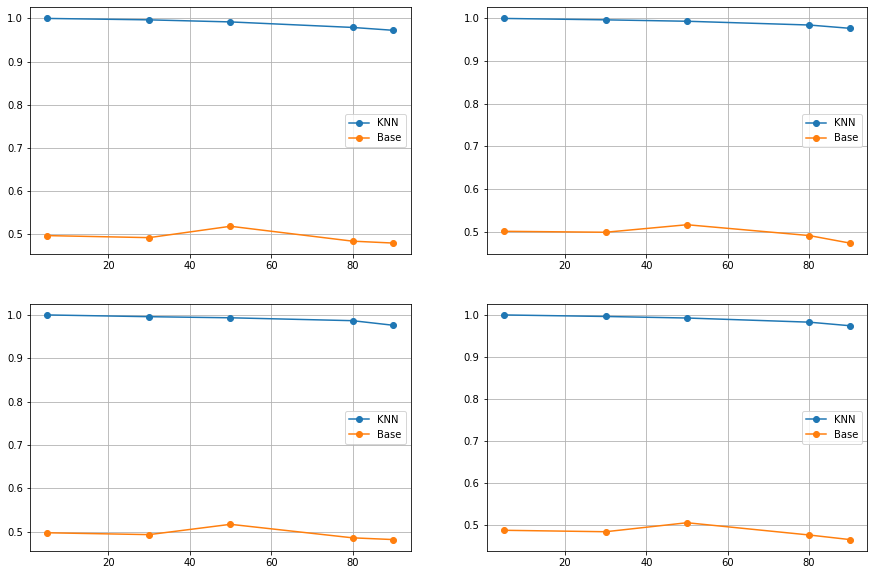

In [56]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
# plt.plot(kk, recall_axis,kk,baselineresult_recall,marker='o')
plt.plot(kk,recall_axis,label="KNN",marker='o')
plt.plot(kk,baselineresult_recall,label="Base",marker='o')
plt.legend(loc="center right")
plt.grid(True)
# plt.show()
plt.subplot(2,2,2)
plt.plot(kk, accuracy_axis,label="KNN",marker='o')
plt.plot(kk,baselineresult_accuracy,label="Base",marker='o')
plt.legend(loc="center right")
plt.grid(True)
# plt.show()
plt.subplot(2,2,3)
plt.plot(kk, precision_axis,label="KNN",marker='o')
plt.plot(kk,baselineresult_precision,label="Base",marker='o')
plt.legend(loc="center right")
plt.grid(True)
# plt.show()
plt.subplot(2,2,4)
plt.plot(kk, f1_score_axis,label="KNN",marker='o')
plt.plot(kk,baselineresult_f1score,label="Base",marker='o')
plt.legend(loc="center right")
plt.grid(True)
plt.show()

# Test Data (KNN)

In [17]:
test_df = pd.read_csv("/home/pratik/Downloads/Assignment1 Dataset/Datasets/q2/test.csv",header=None)

k1=5
k2=30
k3=50
k4=80
k5=90

def compare(mushroom_df,test_df):
    countt=0
    j=0
    for x in range(1,len(mushroom_df)):
        if(mushroom_df[x] != test_df[j]):
            countt = countt + 1    
        j=j+1
    return countt

def sortbysecond(val):
    return val[1]

def getcount(result,answer1,answer2,answer3,answer4,answer5,answer6):
    countte=0
    counttp=0
    ans=0
    for i in range(0,k5):
        if(result[i][0] == 'e'):
            countte = countte + 1
        else:
            counttp = counttp+1
        if(i==k1-1):
            if(counttp > countte):
                ans = 'p'
            else:
                ans = 'e'
            answer1.append(ans)
        elif(i==k2-1):
            if(counttp > countte):
                ans = 'p'
            else:
                ans = 'e'
            answer2.append(ans)
        elif(i==k3-1):
            if(counttp > countte):
                ans = 'p'
            else:
                ans = 'e'
            answer3.append(ans)
        elif(i==k4-1):
            if(counttp > countte):
                ans = 'p'
            else:
                ans = 'e'
            answer4.append(ans)
        elif(i==k5-1):
            if(counttp > countte):
                ans = 'p'
            else:
                ans = 'e'
            answer5.append(ans)
        elif(i==k6-1):
            if(counttp > countte):
                ans = 'p'
            else:
                ans = 'e'
            answer6.append(ans)

result=[]
testresult1=[]
testresult2=[]
testresult3=[]
testresult4=[]
testresult5=[]
testresult6=[]
mushroom_df = mushroom_df.to_numpy()
test_df = test_df.to_numpy()
for j in range(0,len(test_df)): ## takes entry from test data
    result=[]
    print(j)
    for i in range(0,len(mushroom_df)): ## takes each tuple of training data
        x = compare(mushroom_df[i],test_df[j])
        result.append([mushroom_df[i,0],x])
    result.sort(key = sortbysecond)
    getcount(result,testresult1,testresult2,testresult3,testresult4,testresult5,testresult6)

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [59]:
test_precision=[]
test_recall=[]
test_accuracy=[]
test_f1score=[]
test_label = pd.read_csv("/home/pratik/Downloads/Assignment1 Dataset/Datasets/q2/test_labels.csv",header=None)

def storeresult(testresult):
    test_accuracy.append(accuracy_score(test_label,testresult))
    test_precision.append(precision_score(test_label,testresult,average="macro",pos_label=1))
    test_recall.append(recall_score(test_label,testresult,average="macro",pos_label=1))
    test_f1score.append(f1_score(test_label,testresult,average="macro",pos_label=1))
    
storeresult(testresult1)
storeresult(testresult2)
storeresult(testresult3)
storeresult(testresult4)
storeresult(testresult5)

In [ ]:
# KNN SKLEARN

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
sklearknn_accuracy=[]
sklearnknn_recall=[]
sklearnknn_precision=[]
sklearnknn_f1score=[]

def sklearnknn(k):
    test_label = pd.read_csv("/home/pratik/Downloads/Assignment1 Dataset/Datasets/q2/test_labels.csv",header=None)
    test_dff = pd.read_csv("/home/pratik/Downloads/Assignment1 Dataset/Datasets/q2/test.csv",header=None)
    
    ddf = training_df.copy()
    tt = LabelEncoder()
    labels= tt.fit_transform(ddf.iloc[:,0])
    ddf.drop(columns=1,inplace=True,axis=1)
    ddf = ddf.apply(LabelEncoder().fit_transform)

    test_dff = test_dff.apply(LabelEncoder().fit_transform)
    test_label = test_label.apply(LabelEncoder().fit_transform)
        
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(ddf,labels)
    predict = neigh.predict(test_dff)
    
    sklearknn_accuracy.append(accuracy_score(test_label,predict))
    sklearnknn_recall.append(recall_score(test_label,predict,average="macro",pos_label=1))
    sklearnknn_precision.append(precision_score(test_label,predict,average="macro",pos_label=1))
    sklearnknn_f1score.append(f1_score(test_label,predict,average="macro",pos_label=1))

sklearnknn(5)
sklearnknn(30)
sklearnknn(50)
sklearnknn(80)
sklearnknn(90)


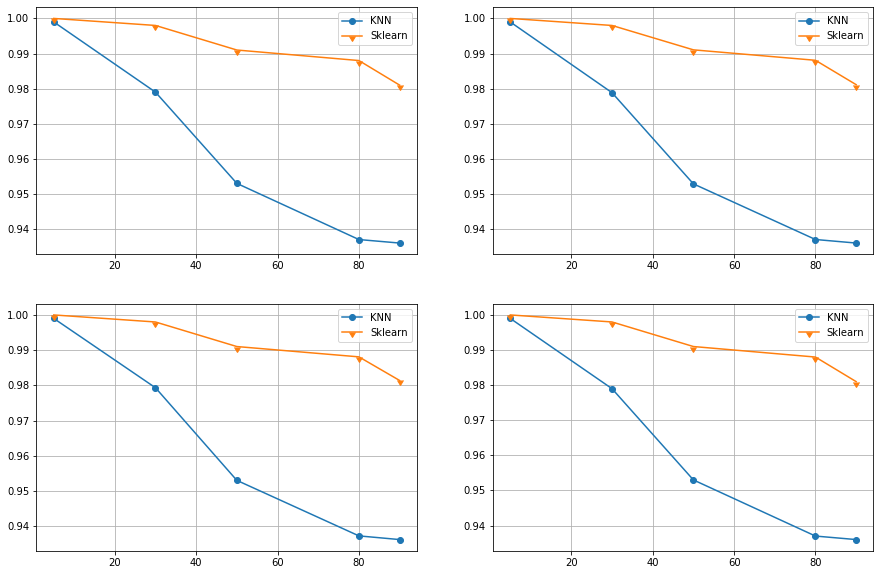

In [65]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(kk, sklearknn_accuracy,label="KNN",marker='o')
plt.plot(kk,test_accuracy,label="Sklearn",marker=11)
plt.legend(loc="upper right")
plt.grid(True)
plt.subplot(2,2,2)
plt.plot(kk, sklearnknn_recall,label="KNN",marker='o')
plt.plot(kk,test_recall,label="Sklearn",marker=11)
plt.legend(loc="upper right")
plt.grid(True)
plt.subplot(2,2,3)
plt.plot(kk, sklearnknn_precision,label="KNN",marker='o')
plt.plot(kk,test_precision,label="Sklearn",marker=11)
plt.legend(loc="upper right")
plt.grid(True)
plt.subplot(2,2,4)
plt.plot(kk, sklearnknn_f1score,label="KNN",marker='o')
plt.plot(kk,test_f1score,label="Sklearn",marker=11)
plt.legend(loc="upper right")
plt.grid(True)
plt.show()